In [1]:
from RidgeTrough.lines import grads, max_grads, ridge_gif
from RidgeTrough.cdf_data import CDFData
import matplotlib.pyplot as plt
%load_ext autoreload
import os

In [2]:
%autoreload

In [3]:
DATA_ROOT = r"E:\WeatherData"
year = 2000
hgt_path = os.path.join(DATA_ROOT,"hgts",f'hgt.{year}.nc')
uwnd_path = os.path.join(DATA_ROOT,"u_winds",f'uwnd.{year}.nc')
vwnd_path = os.path.join(DATA_ROOT,"v_winds",f'vwnd.{year}.nc')
cdf = CDFData(hgt_path = hgt_path)

INFO:root: 13:33:28 - Retrieved 2000 hgt data


In [12]:
# %matplotlib notebook
%matplotlib inline
# %matplotlib ipympl

In [5]:
hgts = cdf.hgts[...,:(len(cdf.lats) //2), :]
g = grads(hgts)

getting gradients: 100%|████████████████████████████████████████████████████████████| 366/366 [00:02<00:00, 164.11it/s]


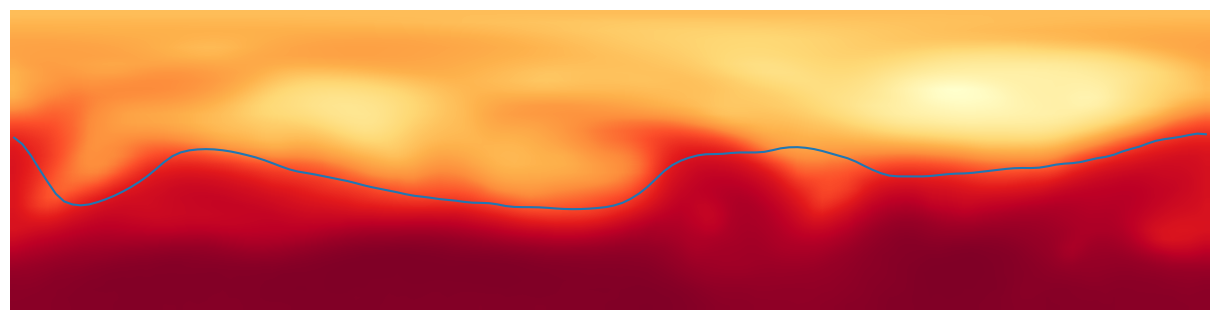

In [14]:
m = max_grads(g, sigma=(1.,1.,1.))
ridge_gif(hgts, m, level=5)